In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

<Axes: xlabel='Category', ylabel='count'>

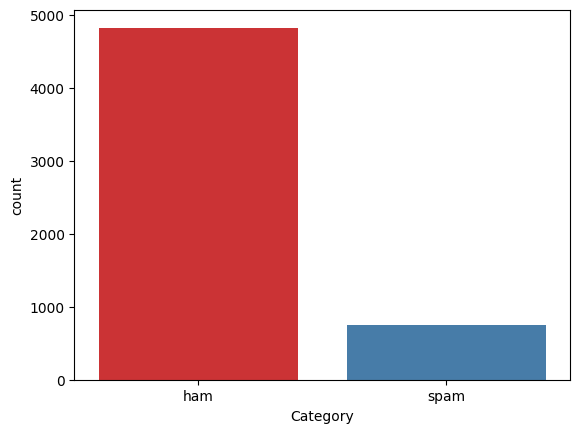

In [5]:
sns.countplot(x='Category',data = df,palette = 'Set1')

In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# label spam mail as 0;  ham mail as 1;

df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

In [8]:
X = df['Message']
Y = df['Category']

In [9]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [10]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 3)

In [21]:
#Feature extraction:transform the text data to feature vectors that can be used as input to the lgc
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [23]:
X_train_features

<4457x7431 sparse matrix of type '<class 'numpy.float64'>'
	with 34775 stored elements in Compressed Sparse Row format>

In [34]:
#train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgc = LogisticRegression()
lgc.fit(X_train_features,Y_train)
#predicting on training data
X_train_features_pred = lgc.predict(X_train_features)
X_train_features_acc = accuracy_score(Y_train,X_train_features_pred)
print('Accuracy on training data: ',X_train_features_acc)

Accuracy on training data:  0.9670181736594121


In [35]:
#predicting on test data
X_test_features_pred = lgc.predict(X_test_features)
X_test_features_acc = accuracy_score(Y_test,X_test_features_pred)
print('Accuracy on test data: ',X_test_features_acc)

Accuracy on test data:  0.9659192825112107


In [36]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = lgc.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
